## AutoEncoder assignment to load an autoencoder and train it to identify the alphabet 'J' along with the mnist dataset

Loading the model

In [23]:
import numpy as np
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [24]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

Loading images

In [25]:
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'J{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

Predict J images using initial encoder

In [26]:
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 109ms/step
(5, 784)


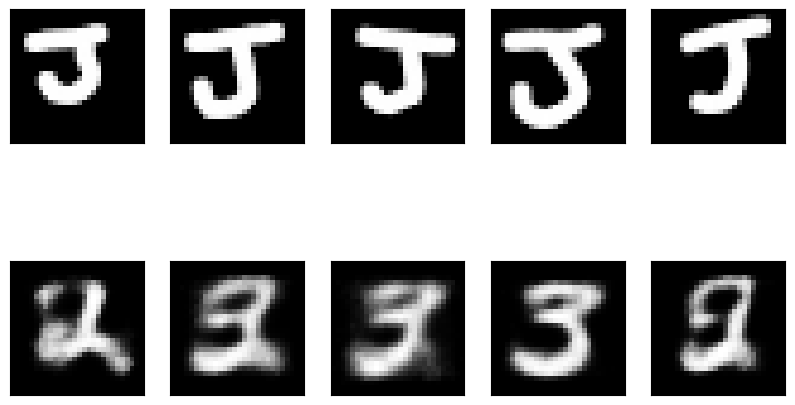

In [27]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

merge J images with training data

In [28]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [29]:
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 27, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

(60000, 784)
(10000, 784)


In [30]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

Train & Test how our model does on the original 10 digits

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.1488 - val_loss: 0.1446
Epoch 2/15
1/1 [==============================] - 0s 115ms/step - loss: 0.1365 - val_loss: 0.1371
Epoch 3/15
1/1 [==============================] - 0s 111ms/step - loss: 0.1287 - val_loss: 0.1309
Epoch 4/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1225 - val_loss: 0.1277
Epoch 5/15
1/1 [==============================] - 0s 105ms/step - loss: 0.1190 - val_loss: 0.1234
Epoch 6/15
1/1 [==============================] - 0s 129ms/step - loss: 0.1140 - val_loss: 0.1190
Epoch 7/15
1/1 [==============================] - 0s 111ms/step - loss: 0.1085 - val_loss: 0.1162
Epoch 8/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1046 - val_loss: 0.1128
Epoch 9/15
1/1 [==============================] - 0s 106ms/step - loss: 0.1003 - val_loss: 0.1099
Epoch 10/15
1/1 [==============================] - 0s 105ms/step - loss: 0.0967 - val_loss: 0.1082
Epoch 11/15
1/1 [=====

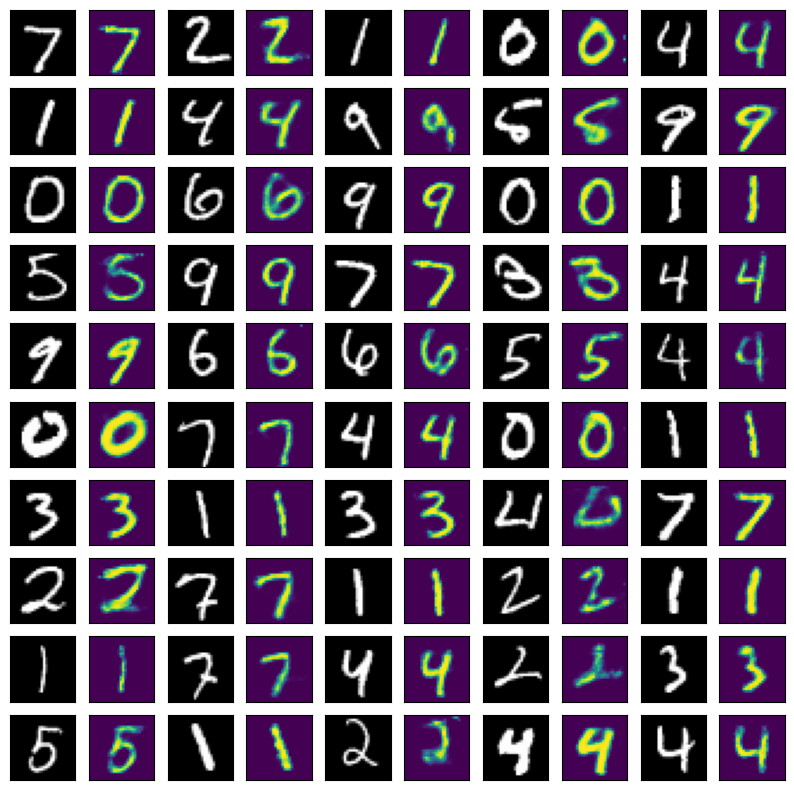

In [31]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

Loading images again

In [33]:
images = []
for i in range(5):
    img_path = f'J{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)

Predict J images using modified encoder

In [34]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 39ms/step
(5, 784)


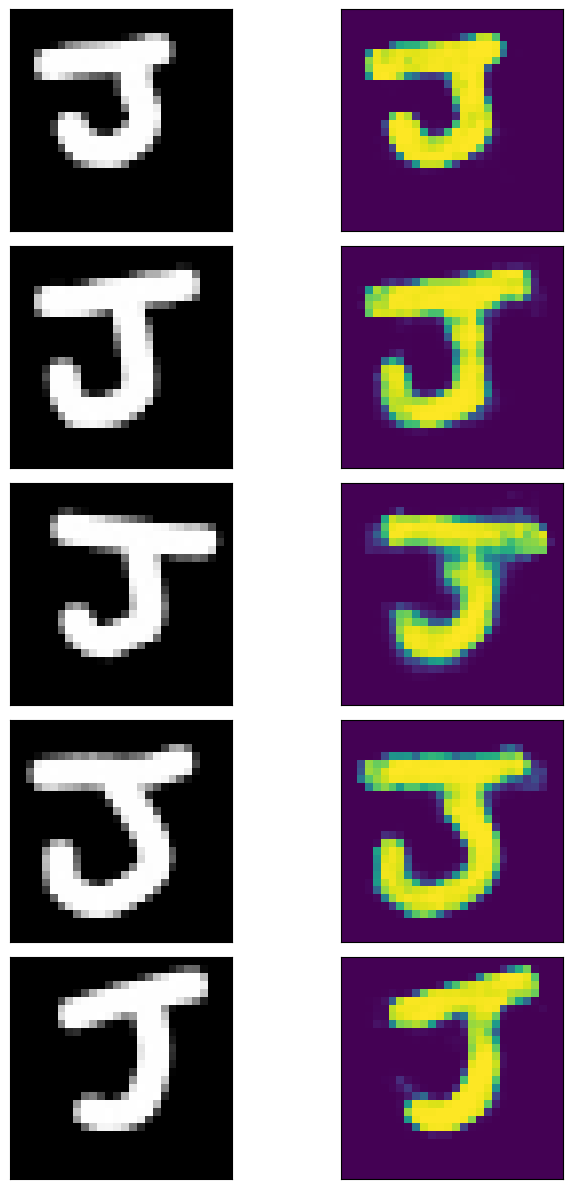

In [35]:

rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    
    axs[i,1].imshow(predictions[i].reshape(28,28))
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])

plt.tight_layout()
plt.show()

In [37]:
updated_model.save('modified_autoencoder.h5')